# Introduction to my final project.

***

### I will use this file to write a concise summary of everything that will be used in my final project.

### 1. Linear Model

#### 1.1 Linear Regression:

`Multiple Linear Regression` Interpretation formula:

y (dependant variable) = intercept(b0) + b1(feature)* slope(x or independant variable) + b2*x2 .... + bn * xn

Goal is to predict the data with the parameters that will have the lowest Mean Squared Error and higher r2 score.

> MSE = (y_actual - y_predicted)**2.sum()

For this task I will use `LinearRegression()` and manual method by defining the helper function and Ridge Regression.

#### 1.2 Ridge Regression

Regularization method that applies L2 penalization to the independant variables 

- used to prevent overfitting and to control the colinearity between the features

- Higher the alpha = bigger the restriction on the features (shrinkage)

- it does not eliminate the features from the equation! 

Formula:

sum(y_actual - y_pred)**2 + λ∑βj2​

Where:

- λλ = regularization strength (hyperparameter)

-  = model coefficients

I will also apply train_test_split with 80/20 method.


***

Dataset used in this project is **Boston Housing** dataset.

### Boston housing dataset. 

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's


From all the features above, ZN and CHAS seems not to be relevant in predicting the MEDV. They are int/float but are more categorical than numerical.

### Import everything necessary:

In [1]:
### --- Setup - importing the libraries
import warnings
warnings.simplefilter(action='ignore')


# - data
import numpy as np
import pandas as pd

# - os
import os

# - ml
from scipy.stats import norm
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor


# - visualization
import matplotlib.pyplot as plt
import seaborn as sns

# - sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# - rng
rng = np.random.default_rng(seed=513)

# - plots
plt.rc("figure", figsize=(8, 6))
plt.rc("font", size=14)
sns.set_theme(style='white')

# - directory tree
data_dir = os.path.join(os.getcwd(), '_data')

#### Load the data:

In [2]:
current_dir = os.getcwd()
print(current_dir)
# Dataset is in another folder so I will use the os.walk method to see the folder structure
path = "c:\\Users\Admin\PYIP\Python Data Science - Learning Path\Final Project"
for root,dir,file in os.walk(path):
    print(root,dir,file)

# c:\Users\Admin\PYIP\Python Data Science - Learning Path\Final Project\_data [] ['BostonHousingData.csv']
#path = "c:\\Users\Admin\PYIP\Python Data Science - Learning Path\Final Project\_data"
data_path = "c:\\Users\Admin\PYIP\Python Data Science - Learning Path\Final Project\_data\BostonHousingData.csv"

#full_path = os.path.join(path,data_path)
dataset = pd.read_csv(data_path)
###
display(dataset.tail())
dataset.info()


c:\Users\Admin\Push_now\Python Data Science - Learning Path\Final Project\_notebooks
c:\Users\Admin\PYIP\Python Data Science - Learning Path\Final Project ['_data', '_notebooks', '_outputs', '_reports'] []
c:\Users\Admin\PYIP\Python Data Science - Learning Path\Final Project\_data [] ['BostonHousingData.csv']
c:\Users\Admin\PYIP\Python Data Science - Learning Path\Final Project\_notebooks [] ['boxplot.png', 'guideline.md', 'pre_processing.ipynb', 'Screenshot_1.png', 'Screenshot_2.png', 'train_test_split.png']
c:\Users\Admin\PYIP\Python Data Science - Learning Path\Final Project\_outputs [] []
c:\Users\Admin\PYIP\Python Data Science - Learning Path\Final Project\_reports [] []


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## `EDA`:

## Identification of the strong correlations  between the features:

### 1) Correlation heatmap

### Useful for:

- Detecting multicollinearity 

- Identifying redundant variables ( for example, NOX may strongly correlate with INDUS..)

- Understanding linear relationship between the variables

<Axes: >

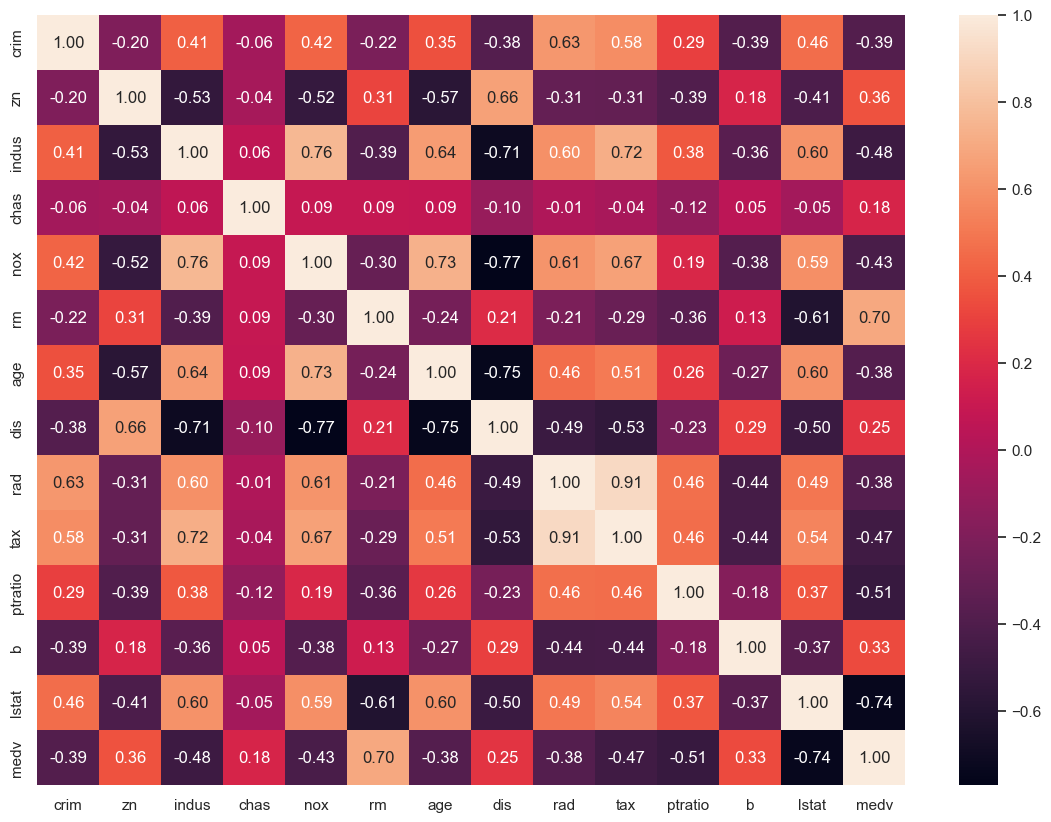

In [3]:
dataset.isna().any()
# none
dataset_corr = dataset.corr()
dataset_corr_T = dataset.corr().T
figure = plt.figure(figsize=(14,10))

sns.heatmap(dataset_corr_T,cmap='rocket',annot=True,fmt=".2f")

In multiple linear regression, the correlation matrix determines the correlation coefficients between the independent variables of a model.

In [4]:
dataset.shape


(506, 14)

In [5]:
#shape of the data is
#506 rows , 14 cols

#### Chas and ZN will be dropped and reload again 

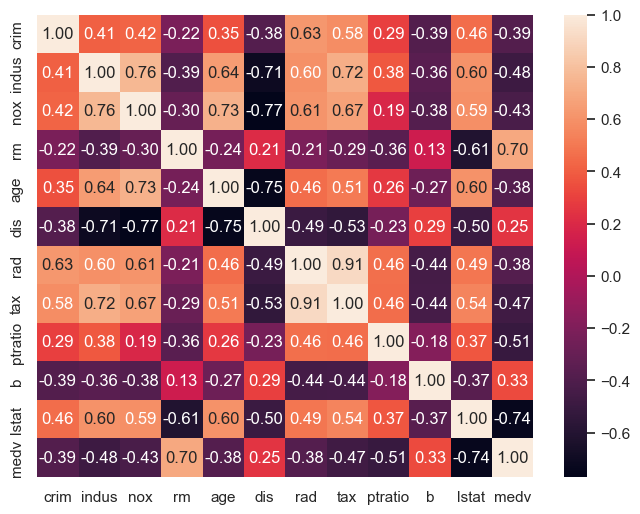

<Figure size 1600x1200 with 0 Axes>

In [6]:
dataset_2 = dataset.drop(columns=['chas','zn'])
dataset_2_correlation = dataset_2.corr(numeric_only=True)
sns.heatmap(data=dataset_2_correlation,annot=True,fmt='.2f')
figure = plt.figure(figsize=(16,12))



In [7]:
dataset_2

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,11.93,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,11.93,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,11.93,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


corr index above >.5 = relevant and >.8 = highly relevant.

### Convert the data frame format from wide to long.

In [8]:
stacked_df = dataset_2_correlation.stack().reset_index().rename(columns={'level_0':'variable-1','level_1':'variable-2','0':'correlation_index'})
stacked_df

,variable-1,variable-2,0
0,crim,crim,1.000000
1,crim,indus,0.406583
2,crim,nox,0.420972
3,crim,rm,-0.219247
4,crim,age,0.352734
...,...,...,...
139,medv,tax,-0.468536
140,medv,ptratio,-0.507787
141,medv,b,0.333461
142,medv,lstat,-0.737663


In [9]:
#remove SELF correlation
stacked = stacked_df[stacked_df['variable-1'] != stacked_df['variable-2']]
stacked

,variable-1,variable-2,0
1,crim,indus,0.406583
2,crim,nox,0.420972
3,crim,rm,-0.219247
4,crim,age,0.352734
5,crim,dis,-0.379670
...,...,...,...
138,medv,rad,-0.381626
139,medv,tax,-0.468536
140,medv,ptratio,-0.507787
141,medv,b,0.333461


In [10]:
# To drop symmetrical duplicates such as A - B and B - a 
# i will create a new column that sorts the pairs 


In [11]:
stacked['pair'] = stacked.apply(lambda row: frozenset([row['variable-1'],row['variable-2']]),axis=1)
stacked_no_dup=stacked.drop_duplicates(subset='pair')
stacked_unique = stacked_no_dup.drop(columns=['pair'])


In [12]:
print(stacked_unique)

    variable-1 variable-2         0
1         crim      indus  0.406583
2         crim        nox  0.420972
3         crim         rm -0.219247
4         crim        age  0.352734
5         crim        dis -0.379670
..         ...        ...       ...
106    ptratio      lstat  0.374044
107    ptratio       medv -0.507787
118          b      lstat -0.366087
119          b       medv  0.333461
131      lstat       medv -0.737663

[66 rows x 3 columns]


Above is data frame with deleted duplicates. Based on this data:

- I will check if there are some highly correlated variables in this data frame

- Will not drop them immediately becuase, I will later use Ridge regression (regularization model)


In [13]:
high_corr = stacked_unique[stacked_unique[0]>0.7]
high_corr

,variable-1,variable-2,0
14,indus,nox,0.763651
19,indus,tax,0.720760
28,nox,age,0.731470
79,rad,tax,0.910228


__rad__ seems more of a categorical variable than **tax**, which presents in the continous pattern.

### Checking the correlation between rad and medv:

In [14]:
subset = dataset[['rad','medv']]
subset.corr().T

,rad,medv
rad,1.000000,-0.381626
medv,-0.381626,1.000000


In [15]:
subset2 = dataset[['tax','medv']]
subset2.corr()


,tax,medv
tax,1.000000,-0.468536
medv,-0.468536,1.000000


### Conclusion:

- Absolute correlation is higher for the __tax__ and I am keeping that columns

- Drop __rad__

In [16]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   indus    506 non-null    float64
 2   nox      506 non-null    float64
 3   rm       506 non-null    float64
 4   age      506 non-null    float64
 5   dis      506 non-null    float64
 6   rad      506 non-null    int64  
 7   tax      506 non-null    int64  
 8   ptratio  506 non-null    float64
 9   b        506 non-null    float64
 10  lstat    506 non-null    float64
 11  medv     506 non-null    float64
dtypes: float64(10), int64(2)
memory usage: 47.6 KB


In [17]:
dataset_2 = dataset_2.drop(columns='rad')

In [18]:
dataset_2.tail(10)

,crim,indus,nox,rm,age,dis,tax,ptratio,b,lstat,medv
496,0.28960,9.69,0.585,5.390,72.9,2.7986,391,19.2,396.90,21.14,19.7
497,0.26838,9.69,0.585,5.794,70.6,2.8927,391,19.2,396.90,14.10,18.3
498,0.23912,9.69,0.585,6.019,65.3,2.4091,391,19.2,396.90,12.92,21.2
499,0.17783,9.69,0.585,5.569,73.5,2.3999,391,19.2,395.77,15.10,17.5
500,0.22438,9.69,0.585,6.027,79.7,2.4982,391,19.2,396.90,14.33,16.8
501,0.06263,11.93,0.573,6.593,69.1,2.4786,273,21.0,391.99,9.67,22.4
502,0.04527,11.93,0.573,6.120,76.7,2.2875,273,21.0,396.90,9.08,20.6
503,0.06076,11.93,0.573,6.976,91.0,2.1675,273,21.0,396.90,5.64,23.9
504,0.10959,11.93,0.573,6.794,89.3,2.3889,273,21.0,393.45,6.48,22.0
505,0.04741,11.93,0.573,6.030,80.8,2.5050,273,21.0,396.90,7.88,11.9


### Next step - Detecting the outliers 

- **loop** + **boxplot**

- I will not compare dataset without outliers and the original dataset in this project

fig,ax 

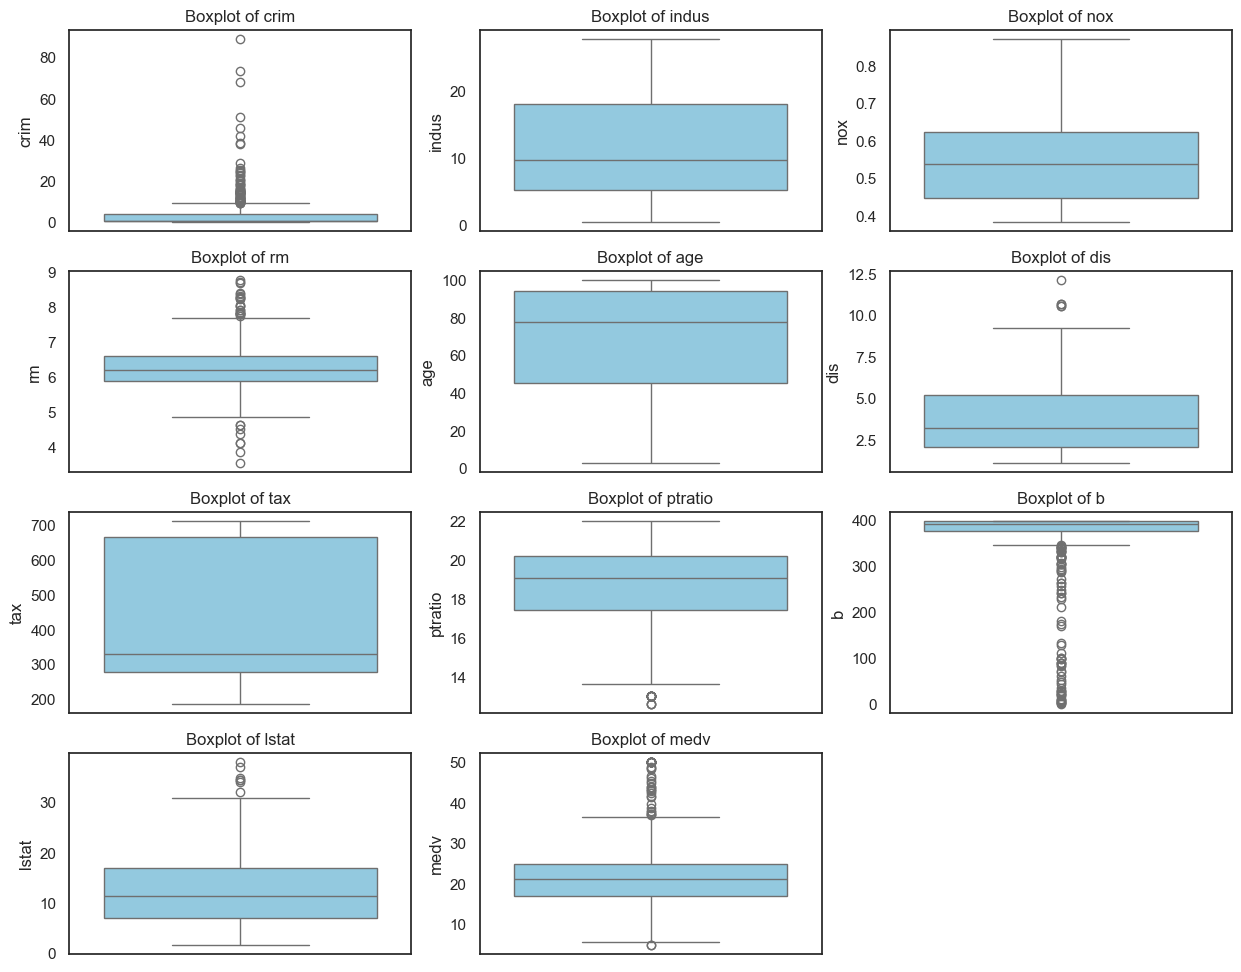

<Figure size 800x600 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume your DataFrame is named dataset_2

# Set up the subplot grid
fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
ax = ax.flatten()  # Flatten axes array for easy looping

# Loop through each column and create boxplot
for i, col in enumerate(dataset_2.columns):
    sns.boxplot(data=dataset_2, y=col, ax=ax[i], color='skyblue')
    ax[i].set_title(f'Boxplot of {col}')

for j in range(len(dataset_2.columns),len(ax)):
    fig.delaxes(ax[j])
        


plt.show()
plt.savefig('boxplot.png')


### Low variance , should they be dropped?

No , because we previously showed that there is some absolute correlation even while variance is low for the "NOX" feature, so I will keep it.

In [20]:
low_variance = dataset_2.var().sort_values()
low_variance

nox            0.013428
rm             0.493671
dis            4.434015
ptratio        4.686989
indus         47.064442
lstat         50.994760
crim          73.986578
medv          84.586724
age          792.358399
b           8334.752263
tax        28404.759488
dtype: float64

### Standardization of the features

> ### Before Ridge Regression

Ridge regression place a penalty on the magnitude of the coefficients associated with each variable, and the scale of variables will affect how much of a penalty will be applied on their coefficients. Coefficients of variables with a large variance are small and thus less penalized. Therefore, standardization is required before fitting both regressions.

## 1. Linear regression


In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [22]:
#multiple lg
# target variable 'medv'
# independant (x) variables dataset_2[:'medv']
target_variable = dataset_2['medv']
feature_matrix = dataset_2.drop(columns={'medv'})

## `train_test_split (test data=.2)`

### Goal is to see how model generalizes to new unsesen data.

- For that purpose , i will train the model on X_train , y_train

- Predictions will be made on X_test.

***

## 1.1 Model prediction `attempt1`

c:\Users\Admin\Push_now\Python Data Science - Learning Path\Final Project\_notebooks


ValueError: Could not save to JPEG for display

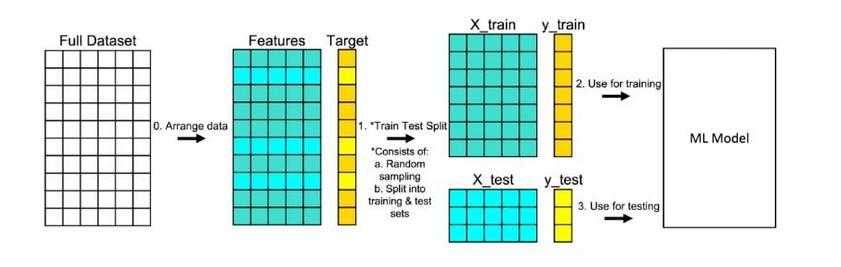

In [23]:
import os
from PIL import Image
work_dir = os.getcwd()
work_dir
print(work_dir)
Image.open("c:\\Users\Admin\PYIP\Python Data Science - Learning Path\Final Project\_notebooks\\train_test_split.png")

### train_test_split (test data=.2)

In [24]:
from sklearn.model_selection import train_test_split
X,y = feature_matrix,target_variable
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)
lr =model.fit(X_train,y_train)
model_predict_attemp1 = model.predict(X_test)

In [25]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

r2score_model_attemp1 = r2_score(y_test,model_predict_attemp1)
print(f"R_2 score is: {r2score_model_attemp1}")
mse_model_attemp1  = mean_squared_error(y_test,model_predict_attemp1)
print(f"Mean Squarred error is: {mse_model_attemp1}")

R_2 score is: 0.6169372654376588
Mean Squarred error is: 28.091439513195084


### 1.2 Manual optimization of the parameters attempt 1

#### Must be aware that ['feature matrix'] is a multi feature and we can not treat it as a single variable!

> One coeff. per feature 

- Also, use X_train, y_train data and not the full dataset for minimizing the sum squared errors.

In [26]:
# y_hat = b0 + b1*x1 + b2*x2 + bn*xn....+ e 
X,y = feature_matrix,target_variable
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=.20)

def SSE(parameters):
    b0 = parameters[0]
    if len(parameters) == X_train.shape[1]+1:
        bn = np.array(parameters[1:])
        y_hat = b0 + X_train.values @ bn
        resid = (y_train - y_hat)**2
        resid = resid.sum()
        return resid
    else:
        #check the actual shape
        raise ValueError(f"Expected {X_train.shape[1] +1 } parameters, got {len(parameters)}")
        
parameters = [123,11,124,10,12,14,16,17,19,12,90]
SSE(parameters)


99384324156.34494

In [27]:
n_features = X_train.shape[1] + 1
empty_dict = {}
for i in range(n_features):
    stats = rng.uniform(low=-10,high=11,size=1000)
    stastv1 = norm.rvs()
    key = f"b{i}"
    print(key)
    empty_dict[key] = stats
empty_dict

#toDataFrame

random_data_frame = pd.DataFrame(empty_dict)
random_data_frame

random_data_frame.shape





b0
b1
b2
b3
b4
b5
b6
b7
b8
b9
b10


(1000, 11)

X_train.shape[1] - > number of columns (__features__) and __+1__ beacuse of b0 

#### Now, need to minimize the SSE and get the lowest b0 and bn possible.

In [28]:
random_data_frame.shape
# (1000, 11)
sse=[]
for i in range(random_data_frame.shape[0]):
    values = random_data_frame.iloc[i].values
    sse_values = SSE(values)
    sse.append(sse_values)

random_data_frame['SSE']= sse
random_data_frame

,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,SSE
0,-1.990138,10.846918,6.439636,8.720755,1.948933,-4.112375,3.130468,0.314343,-2.124267,-4.822375,-3.633150,1.471162e+09
1,-4.423705,-4.767730,10.030914,10.145229,7.434019,0.461131,9.290796,0.897006,-1.669769,-2.718474,9.017450,1.112344e+08
2,1.149006,-4.137289,6.203096,8.832784,4.924263,8.281170,3.938312,-3.083010,-5.743323,8.611896,-5.061927,2.596316e+09
3,-1.497167,-2.870490,8.907209,4.901521,5.763917,9.755651,10.990989,1.569700,2.175682,10.175829,6.736885,1.120504e+10
4,-6.688515,2.640241,3.690698,6.039810,6.051895,-6.446435,4.514534,-8.754731,-8.946986,4.314728,0.159800,3.791645e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
995,-6.434598,-8.843609,5.937172,-6.486464,3.362720,-3.874659,-6.161920,-8.983183,-0.023936,-0.920641,3.005910,8.000482e+09
996,5.671379,-0.569708,-0.486281,10.925998,4.227235,3.497065,-9.434773,-6.265034,7.879939,5.052217,2.752601,6.709123e+08
997,6.350529,-7.091777,-6.862306,6.762671,8.925034,3.845013,10.460211,-0.913526,4.982563,0.148353,1.907296,1.635058e+07
998,-9.218949,6.094690,3.087005,10.692320,-0.133091,0.948844,-0.550938,-7.080386,4.698778,-2.438810,-6.859457,5.793648e+09


SSE uzima parametre, i racuna rezidual , pri cemu sto manji to je bolji

get_lowest prolazi kroz izmisljene b0 i bn parametre i uzima najmanje moguce, koji se prosledjuju u SSE f-ju.

best_values se posle izracunaju, odnosno b0(intercept) i b1 ,b2..bn

In [29]:
organized_data=random_data_frame.sort_values(by='SSE',ascending=True,ignore_index=True)

### Now select the lowest values

In [30]:
lowest_values = organized_data.iloc[0:1,:]
lowest_values

,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,SSE
0,6.350529,-7.091777,-6.862306,6.762671,8.925034,3.845013,10.460211,-0.913526,4.982563,0.148353,1.907296,1.635058e+07


In [31]:
from scipy import optimize
 #Excluding the SSE and need to transform to one dim 
lowest_values_without_sse = lowest_values.iloc[0,:-1]
lowest_values_without_sse

b0      6.350529
b1     -7.091777
b2     -6.862306
b3      6.762671
b4      8.925034
b5      3.845013
b6     10.460211
b7     -0.913526
b8      4.982563
b9      0.148353
b10     1.907296
Name: 0, dtype: float64

In [32]:
optimized_model = optimize.minimize(
    fun=SSE,
    x0=lowest_values_without_sse,
    method='Nelder-Mead'
)

optimized_model

       message: Maximum number of function evaluations has been exceeded.
       success: False
        status: 1
           fun: 10470.482298220279
             x: [ 3.420e+01 -6.670e-02 -1.682e-01  6.030e+00  3.144e+00
                 -3.538e-02 -1.300e+00 -1.773e-03 -1.045e+00  8.085e-03
                 -6.519e-01]
           nit: 1583
          nfev: 2200
 final_simplex: (array([[ 3.420e+01, -6.670e-02, ...,  8.085e-03,
                        -6.519e-01],
                       [ 3.420e+01, -6.701e-02, ...,  8.094e-03,
                        -6.515e-01],
                       ...,
                       [ 3.420e+01, -6.681e-02, ...,  8.074e-03,
                        -6.518e-01],
                       [ 3.420e+01, -6.704e-02, ...,  8.067e-03,
                        -6.517e-01]]), array([ 1.047e+04,  1.047e+04,  1.047e+04,  1.047e+04,
                        1.047e+04,  1.047e+04,  1.047e+04,  1.047e+04,
                        1.047e+04,  1.047e+04,  1.047e+04,  1.047e+04])

### Lets get the best `(optimized)` parameters

In [33]:
optimized_params = optimized_model.x
optimized_params
feature_names = ['intercept'] + list(X_train.columns)
feature_names
keys = feature_names
values = optimized_params
make_one = list(zip(keys,values))
make_one

[('intercept', 34.20303344194545),
 ('crim', -0.06669569659760982),
 ('indus', -0.16821499825909658),
 ('nox', 6.030050190179528),
 ('rm', 3.1436138173565826),
 ('age', -0.03538256914182647),
 ('dis', -1.2999249168595024),
 ('tax', -0.0017728760331528872),
 ('ptratio', -1.0446302427787022),
 ('b', 0.008084714966536656),
 ('lstat', -0.6518503340922084)]

In [34]:
new_dataf = pd.DataFrame(make_one,columns=['features','best_values'])
new_dataf

,features,best_values
0,intercept,34.203033
1,crim,-0.066696
2,indus,-0.168215
3,nox,6.030050
4,rm,3.143614
5,age,-0.035383
6,dis,-1.299925
7,tax,-0.001773
8,ptratio,-1.044630
9,b,0.008085


In [35]:
optimized_intercept = new_dataf.loc[new_dataf['features']=='intercept','best_values'].values[0]
optimized_intercept
optimized_features = new_dataf.loc[new_dataf['features']!='intercept','best_values'].values[:]
optimized_features.tolist()

[-0.06669569659760982,
 -0.16821499825909658,
 6.030050190179528,
 3.1436138173565826,
 -0.03538256914182647,
 -1.2999249168595024,
 -0.0017728760331528872,
 -1.0446302427787022,
 0.008084714966536656,
 -0.6518503340922084]

In [36]:
y_pred_manual = optimized_intercept + X_test.values @ optimized_features

In [37]:
y_pred_manual.shape
y_test.shape
# (102,)


(102,)

In [38]:
manual_predictions_attempt1 = pd.DataFrame({"y_pred_manual":y_pred_manual,'model_pred_attempt1':model_predict_attemp1,'y_test':y_test}).reset_index().drop(columns={'index'}).sort_values(by='y_test',ascending=True)
                              
manual_predictions_attempt1

,y_pred_manual,model_pred_attempt1,y_test
75,5.433223,6.312128,5.0
12,-4.875757,-6.137812,7.0
79,9.355461,13.030857,7.0
98,15.239323,13.773746,9.6
83,8.892484,8.557807,9.7
...,...,...,...
54,41.902122,39.645419,43.5
77,38.056838,39.263217,48.5
96,23.296072,24.135868,50.0
42,39.261023,40.608948,50.0


### Notable discrepancies between the manual data and the model predictions.

#### I will compare model parameters and manually optimized parameters here:

In [39]:
## Metrics
mse_manual_attempt1 = mean_squared_error(y_test,y_pred_manual)
mae_manual_attempt1 = mean_absolute_error(y_test,y_pred_manual)
r2score_manual_attempt1 = r2_score(y_test,y_pred_manual)
print(f'mse_manual_attempt1 is {mse_manual_attempt1}\nr2_manual_attempt1 is {r2score_manual_attempt1}')

mse_manual_attempt1 is 27.418823207127737
r2_manual_attempt1 is 0.6261092497139489


## Manual model is performing worse than simply predicting the mean of y_test for all cases

***

## 2.1 Model prediction attempt_2

In [40]:
feature_matrix.shape
target_variable.shape
# BOTH (506,)

(506,)

In [41]:
#Train test split
X,y = feature_matrix,target_variable
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [42]:
model_2 = LinearRegression()
model_fitting = model_2.fit(X_train,y_train)
model_predicting = model_2.predict(X_test)
lr_model_coeff= model_2.coef_
model_2.intercept_

24.26743750723468

In [43]:
model_predicting.shape

(102,)

In [44]:
model_2 = pd.DataFrame({'y_test':y_test,'model_predictions_2':model_predicting}).reset_index(drop=True)
model_2

r2score_model_attempt2 = r2_score(y_test,model_predicting)
mae_model_attempt_2 = mean_absolute_error(y_test, model_predicting)
mse_model_attempt_2 = mean_squared_error(y_test,model_predicting)
print(f"Coefficient of correlation (r2score) is: {r2score_model_attempt2}\nAnd MSE is: {mse_model_attempt_2}")


Coefficient of correlation (r2score) is: 0.6169372654376588
And MSE is: 28.091439513195084


In [45]:
feature_matrix


,crim,indus,nox,rm,age,dis,tax,ptratio,b,lstat
0,0.00632,2.31,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98
1,0.02731,7.07,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14
2,0.02729,7.07,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03
3,0.03237,2.18,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94
4,0.06905,2.18,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,2.4786,273,21.0,391.99,9.67
502,0.04527,11.93,0.573,6.120,76.7,2.2875,273,21.0,396.90,9.08
503,0.06076,11.93,0.573,6.976,91.0,2.1675,273,21.0,396.90,5.64
504,0.10959,11.93,0.573,6.794,89.3,2.3889,273,21.0,393.45,6.48


In [46]:
feature_matrix.columns
num_of_columns = feature_matrix.shape[1]
num_of_columns

10

In [47]:
feature_matrix.columns

Index(['crim', 'indus', 'nox', 'rm', 'age', 'dis', 'tax', 'ptratio', 'b',
       'lstat'],
      dtype='object')

## 2.2 Manual Predictions attempt_2

In [48]:
# Def function to handle that will minimize the Sum squared errors
# Func. will take parameters based on the number of features + 1 for the b0 (intercept)
# number of parameters must be same as the number of features in the data
def sse_handle_2(parameters):
    intercept_2 = parameters[0]
    if len(parameters) != num_of_columns+1:
        print("Please check if the number of features corresponds to the number of parameters")
        raise ValueError(f"Got {parameters}, expected {num_of_columns +1}")
    else:
        features_2 = parameters[1:]
        y_pred_manual_2 = intercept_2 + X_train.values @ features_2
        # residual now
        resid = ((y_train - y_pred_manual_2)**2).sum()
        return resid
        

### Populate empty data frame with random data so we can optimize the coeff and intercept.

I have changed also `low` and `high` argument.

### Mistake 1. IMPORTANT.

I tried to populate data frame with same columns as the feature matrix but since there are no rows

__synthetic_df.shape[0] == 0__

will result in `nothing`

### Instead:

- Generate 2D array of random numbers or empty 

In [49]:
n_samples = 1000
n_feature = X_train.shape[1]  # for intercept
nd_array = rng.uniform(low=-10,high=10,size=(1000,n_features))
nd_array.shape

(1000, 11)

### Now populate it with random uniform data.





In [50]:
manual_random_data = pd.DataFrame(nd_array,columns=['intercept']+list(feature_matrix.columns))
manual_random_data

,intercept,crim,indus,nox,rm,age,dis,tax,ptratio,b,lstat
0,3.659230,-3.027400,9.780209,-7.039672,9.969995,-0.187847,-6.263005,-3.598548,8.196795,-1.171905,-2.836958
1,-0.249007,-7.972571,-3.689329,5.252055,-4.719597,0.307957,-8.405518,8.070791,4.178989,-8.463855,3.128608
2,-0.905146,-3.740947,-0.214509,6.352475,0.405264,-4.730827,0.553787,9.017445,-6.100764,-1.448143,-0.857624
3,-7.399884,5.677329,-4.182382,-2.480774,0.547991,-1.388825,6.888681,2.357573,-5.525956,-0.321692,5.943889
4,5.487690,3.118434,-0.795001,-9.514936,-8.774160,2.715697,4.458005,-9.507098,4.151892,-2.765686,-6.479255
...,...,...,...,...,...,...,...,...,...,...,...
995,4.570110,-3.958580,-5.899391,6.430939,-5.017099,1.212924,5.604349,3.955501,-4.235241,-2.187621,8.632378
996,-3.413552,6.200690,-4.089956,3.508594,6.853852,-6.066812,-1.875054,1.302456,4.994104,9.345808,-5.490807
997,-7.225753,7.683421,4.296600,-2.165943,-6.099916,7.865267,-7.896939,-2.782194,2.237390,5.378572,-6.185392
998,-7.399227,-3.665535,5.597508,2.865635,6.425627,1.439258,3.044576,-3.602277,-5.568283,4.528888,8.712921


# SSE 

In [51]:
SSE_2 = []
for i in range(manual_random_data.shape[0]):
    data_points = manual_random_data.iloc[i].values
    result = sse_handle_2(data_points)
    SSE_2.append(result)
manual_random_data['SSE_2'] = SSE_2

In [52]:
manual_random_data.sort_values(by='SSE_2',ascending=True).reset_index(drop=True)

,intercept,crim,indus,nox,rm,age,dis,tax,ptratio,b,lstat,SSE_2
0,-1.234152,8.197948,7.315481,6.627718,-5.861736,-3.223322,8.560713,-0.165632,-3.072634,0.298375,3.140999,8.851858e+06
1,6.492670,6.788562,-9.011552,-9.797604,-4.561143,6.520602,-0.826296,-0.121712,-3.181603,-0.278743,-9.450782,9.347518e+06
2,2.671704,-2.507656,1.251861,6.370348,0.685763,-7.059526,8.684124,1.229230,-1.163499,0.300218,-7.787401,1.952741e+07
3,3.920017,7.425964,7.965462,2.611483,-4.170550,4.789588,1.308850,-1.146820,7.570753,-0.162549,7.501052,1.959417e+07
4,-9.320326,-4.387000,1.390417,6.416278,6.660189,1.757654,-7.914109,-0.139041,2.214202,-0.517796,-9.507008,2.122121e+07
...,...,...,...,...,...,...,...,...,...,...,...,...
995,-5.678135,-5.420836,1.015783,6.817216,-5.680123,-7.234371,7.767730,-7.960863,-9.849250,-9.795427,-1.333521,2.307465e+10
996,-3.930830,6.450733,7.426098,-2.105509,-4.898851,2.217743,-2.618093,9.336819,1.070303,9.630417,9.778086,2.385801e+10
997,4.480316,4.359311,-3.193247,2.663897,-2.373301,-8.341924,-5.150921,-9.038167,3.560768,-9.732816,5.584962,2.432926e+10
998,5.304350,7.781903,8.101761,8.609028,0.964356,8.412994,-4.119699,8.611600,-2.120782,9.660448,5.769126,2.439354e+10


### get the lowest `(optimized parameters)` row 0 , columns all

In [53]:
optimized_params_2 = manual_random_data.iloc[0,:-1]
optimized_params_2

intercept    3.659230
crim        -3.027400
indus        9.780209
nox         -7.039672
rm           9.969995
age         -0.187847
dis         -6.263005
tax         -3.598548
ptratio      8.196795
b           -1.171905
lstat       -2.836958
Name: 0, dtype: float64

In [54]:
optimized_params_2.tolist()

[3.659229986944011,
 -3.0274002663815853,
 9.780209349008274,
 -7.0396717810723235,
 9.969995110309306,
 -0.1878469016132538,
 -6.263005477630443,
 -3.5985479844682917,
 8.196795436479533,
 -1.171904861715504,
 -2.836958099705771]

In [55]:
optimized_intercept_2 = optimized_params_2[0]
optimized_intercept_2


3.659229986944011

In [56]:
optimized_model_2 = optimize.minimize(
    fun=sse_handle_2,
    x0=optimized_params_2,
    method='Nelder-Mead'
)

In [57]:
optimized_parameters_2 = optimized_model_2.x
optimized_intercept_2_latest = optimized_parameters_2[0]
optimized_features_2_latest = optimized_parameters_2[1:]


In [58]:
y_pred_manual_2_latest = optimized_intercept_2_latest + X_test.values @ optimized_features_2_latest
y_pred_manual_2_latest

array([ 31.42140813,  31.34112156,  -9.07746679,  14.32628821,
        -6.40871771,  32.8731118 ,  25.26745345,   3.5683311 ,
         4.76807516,   8.33900543,  30.68144008,  45.60457587,
        40.50116756,  21.2129196 ,  38.25506035,  -1.30766844,
        59.54892437, -39.17771536,  43.66719773,  -4.5107736 ,
        16.61921484,  20.34826722,  31.21804045,  38.05319749,
        10.97994371,  -2.42747152,   7.04338882,  93.27848176,
        37.49864243,   3.53361264,  13.37316717,  36.36818394,
        16.99264533,   2.98868753,  -2.5913447 ,  50.6710226 ,
        64.79226395,  32.78786042,  26.66018707,  13.47207741,
       -15.49927476,  41.95034194,  49.25505022,   9.59213341,
        27.23209857, -11.54463046,  38.50780722,  15.45775503,
        -9.16325105,  36.30341434,  47.00136516,  42.61086627,
        31.31419252,  28.55114558,  35.93802369,  -8.45389185,
        -4.59721721,  38.19995694,  29.60077548,  36.54599997,
        52.71641187,  58.89939211,  12.02070912,  27.06

In [59]:
model_2['y_pred_manual_2_latest'] = y_pred_manual_2_latest
model_2

r2score_manual_attempt2 = r2_score(y_test, y_pred_manual_2_latest)
mse_manual_manual_attempt2 = mean_squared_error(y_test, y_pred_manual_2_latest)

r2score_model_attempt2 = r2_score(y_test, model_predicting)
mse_model_attempt2 = mean_squared_error(y_test, model_predicting)

print(f'r2score_manual_attempt2 is: {r2score_manual_attempt2}\nmse_manual_attempt2 is {mse_manual_manual_attempt2}')
print(f'r2score_model_attempt2 is: {r2score_model_attempt2}\nmse_model_attempt2 is: {mse_model_attempt_2}')





r2score_manual_attempt2 is: -6.7037787962746265
mse_manual_attempt2 is 564.9472437610973
r2score_model_attempt2 is: 0.6169372654376588
mse_model_attempt2 is: 28.091439513195084


In [60]:
# manual predictions r2score and mse

r2_mse_manual_comparison = pd.DataFrame({'r2score_manual_attempt1':[r2score_manual_attempt1],'mse_manual_attempt1':[mse_manual_attempt1],'r2score_manual_attemp2':[r2score_manual_attempt2],'mse_manual_attempt2':[mse_manual_manual_attempt2]}).T.rename_axis(axis=1,mapper='r2 & mse (manual)').rename(columns={0:'Result'})
r2_mse_manual_comparison

# model predictions r2score and mse

r2_mse_model_comparison = pd.DataFrame({'r2score_model_attempt1':[r2score_model_attemp1],'mse_model_attempt1':[mse_model_attemp1],'r2score_model_attempt2':[r2score_model_attempt2],'mse_model_attempt2':[mse_model_attempt_2]})

In [61]:
r2_mse_manual_comparison


r2 & mse (manual),Result
r2score_manual_attempt1,0.626109
mse_manual_attempt1,27.418823
r2score_manual_attemp2,-6.703779
mse_manual_attempt2,564.947244


In [62]:
r2_mse_model_comparison.T.rename_axis(axis=1,mapper='r2 & mse (model)').rename(columns={0:'Result'})

r2 & mse (model),Result
r2score_model_attempt1,0.616937
mse_model_attempt1,28.091440
r2score_model_attempt2,0.616937
mse_model_attempt2,28.091440


***

# 3. Conclusions:

### 3.1 Model Predictions `attempt 1` vs `attempt 2`

- Model Predictions attempt 2 performed same as model 1:

> r2score: 0.62

> MSE: 28.09





- Model predictions attempt 1 performed same as model 2

> r2score: 0.62

> mse: 28.09

### 3.2 Manual predictions `attempt 1` vs `attempt 2`:

In [63]:
r2_mse_manual_comparison

r2 & mse (manual),Result
r2score_manual_attempt1,0.626109
mse_manual_attempt1,27.418823
r2score_manual_attemp2,-6.703779
mse_manual_attempt2,564.947244


Need fix

### **Mistakes and errors** 

1. random state arguement not unifrom across the models 

2. random data generated for SSE optimization was very narrow

3. shape mismatch ( keep using consistent X_test to predict across the models)

4. x0 array can not be 'pandas.series' type, should be list or array

5. must keep `homogenicity` of the data for better understanding and learning

6. train_test_split - if goals is to see how model generalizes new data, I must train on X,y train and predict on X_test

## Next worklofw:

1. Coefficients check - Multicolinearity check, ridge

2. Feature importance with model.coef_

3. keep same random state (42)

4. Step by step, manually tested coefficients and model tested (`model.fit()`)

5. MSE applied manually to coeffiients with generating random parameters with grid or normal gaussian distribution

6. Back to number 1. - Alpha coeff. is important, test few values 0.001,0.01,0.1,1,10,100 

7. With that, combine __`cross_validation`__ and `grid search` to determine the optimal alpha in this list

***

### Ridge regression: Multicolinearity check while keeping the same cleaned dataset.

- I will start with implementing RidgeCV object that can directly fit and transform the X_Train features and tranform X_test

- Create a RidgeCV model with 5-fold cross-validation to automatically select the best alpha ( That is the regularization strenght )


In [64]:
dataset_2

,crim,indus,nox,rm,age,dis,tax,ptratio,b,lstat,medv
0,0.00632,2.31,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,2.4786,273,21.0,391.99,9.67,22.4
502,0.04527,11.93,0.573,6.120,76.7,2.2875,273,21.0,396.90,9.08,20.6
503,0.06076,11.93,0.573,6.976,91.0,2.1675,273,21.0,396.90,5.64,23.9
504,0.10959,11.93,0.573,6.794,89.3,2.3889,273,21.0,393.45,6.48,22.0


In [65]:
from sklearn.linear_model import ridge_regression,RidgeCV,Ridge
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

In [66]:
new_target = dataset_2['medv']
new_features = dataset_2.drop(columns={'medv'})

In [67]:
X = new_features
y = new_target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

scaler = StandardScaler()
model = ridge_regression
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge_cv = RidgeCV(alphas=[0.001, 0.01, 0.1,1,10, 100],cv=5)
ridge_cv.fit(X_train_scaled,y_train)

ridge_cv.coef_

array([-0.71324461, -0.07728186, -1.50594817,  3.44320379, -0.27099624,
       -2.5215257 ,  0.16662604, -1.96903641,  1.10491044, -3.52681518])

In [68]:
y_pred_ridge = ridge_cv.predict(X_test_scaled)
r2score = r2_score(y_test, y_pred_ridge)
MAE = mean_absolute_error(y_test,y_pred_ridge)
print(f'Model score (R^2): {r2score}')

Model score (R^2): 0.6210478938452031


### Ignore; Manual test

***

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2,random_state=42)
X,y = make_regression(n_samples=100,n_features=10,n_informative=8,n_targets=1,noise=9)

alpha = [0.001,0.01,0.1,1]
reg = make_regression(n_samples = 100, n_features=10, n_targets=1, n_informative=8,noise=3)
for a in alpha:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train,y_train)
    y_pred = ridge.predict(X_test)
    print(f"Alpha: {a}\nRidge Coeff: {ridge.coef_}\nMSE: {mean_squared_error(y_test,y_pred)}\n----")

    

Alpha: 0.001
Ridge Coeff: [-8.29464913e-02 -6.13589789e-03 -1.47548584e+01  4.88870825e+00
 -1.03936959e-02 -1.30049311e+00  1.70934922e-03 -9.18642837e-01
  1.23043435e-02 -5.09239838e-01]
MSE: 28.091458880737928
----
Alpha: 0.01
Ridge Coeff: [-8.29091282e-02 -6.57921095e-03 -1.46524149e+01  4.88899887e+00
 -1.04778540e-02 -1.29877840e+00  1.69140684e-03 -9.17599002e-01
  1.23084765e-02 -5.09422381e-01]
MSE: 28.091662840988864
----
Alpha: 0.1
Ridge Coeff: [-8.25617800e-02 -1.07027928e-02 -1.37011793e+01  4.89141455e+00
 -1.12572748e-02 -1.28285475e+00  1.52496274e-03 -9.07918345e-01
  1.23466473e-02 -5.11136340e-01]
MSE: 28.09619186937578
----
Alpha: 1
Ridge Coeff: [-8.05679026e-02 -3.45096125e-02 -8.30915224e+00  4.88811570e+00
 -1.55534121e-02 -1.19248304e+00  5.91039710e-04 -8.53753154e-01
  1.25506415e-02 -5.21990590e-01]
MSE: 28.20198534852155
----


***

## Comparing the coefficients from Linear Model and Ridge regression model:

### **GOAL:**

- Visualize coefficients from Linear Regression (model) and Ridge Regression 

- Detect and observe coefficient shrinkage

In [70]:
ridge_coef=ridge_cv.coef_
ridge_coef.shape
lr_model_coeff.shape

(10,)

In [71]:
feature_matrix.columns
ridge_coef = ridge.coef_
feature_names=feature_matrix.columns

feature_names

coef_df = pd.DataFrame({'lr_coef':lr_model_coeff,'ridge_coef':ridge_coef,'feature_names':feature_names})
coef_df

coef_df_long = pd.melt(coef_df, id_vars='feature_names', value_vars=['lr_coef','ridge_coef'])
#plt.figure(figsize=(16,12))
#coef_df_long = pd.pivot(coef_df, index ='feature_names', columns = 'feature_names', values ='lr_coef'
coef_for_vif = coef_df.iloc[:,0]
coef_for_vif.tolist()

[-0.0829506745087676,
 -0.0060862664511317326,
 -14.766329556293078,
 4.88867536887075,
 -0.010384269756390325,
 -1.3006851162265856,
 0.0017113585172944517,
 -0.9187597349562375,
 0.01230388048095121,
 -0.5092194201791267]

<Axes: xlabel='feature_names', ylabel='value'>

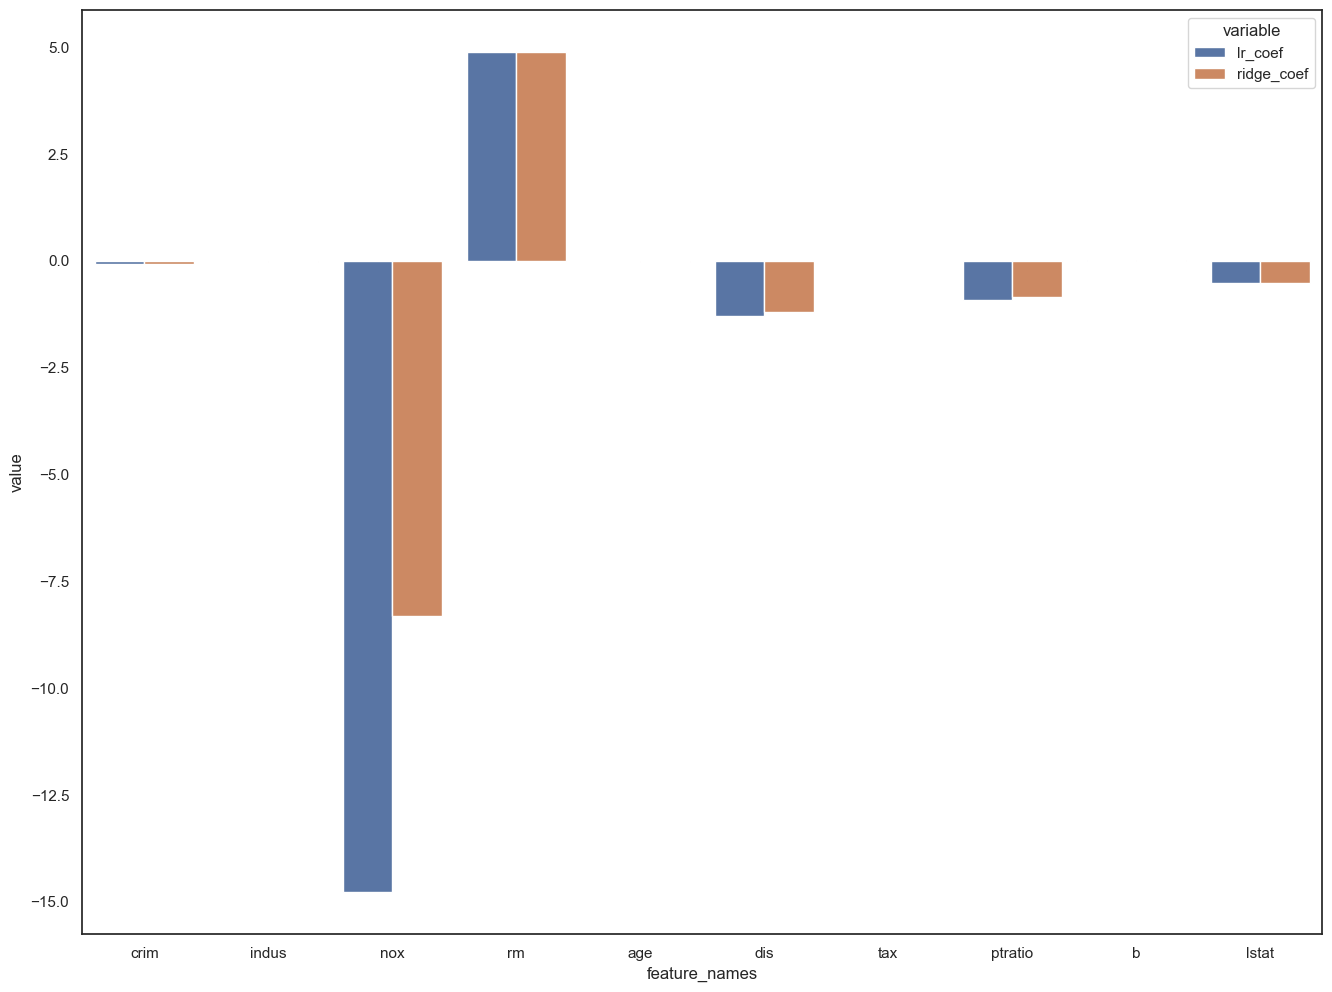

In [72]:
plt.figure(figsize=(16,12))
sns.barplot(data=coef_df_long,x='feature_names',y='value', hue='variable')

## From the barplot I see that 'nox' has been shrinked 

In [73]:
reduced_by =(ridge_coef[2]/lr_model_coeff[2])  
print (f'NOX has been shrinked by the regularization penalty by: {(1 - reduced_by)*100:.2f}%')

NOX has been shrinked by the regularization penalty by: 43.73%


### Comparing r2 score `( model performance )`: 

#### Linear model ( model prediction ) vs Ridge Regression:

In [74]:
print(f"Linear Regression model prediction is: {r2score_model_attempt2}\nRidge Regression r2score is: {r2score}")

Linear Regression model prediction is: 0.6169372654376588
Ridge Regression r2score is: 0.6210478938452031


In [75]:
print(f"Linear Regression MAE is: {mae_model_attempt_2}\nRidge Regression MAE is: {MAE}")

Linear Regression MAE is: 3.461930623766308
Ridge Regression MAE is: 3.424222277190207


Regarding these observations above, Ridge Regression performed better than both model and manual linear regression test.

## Variance inflation factor `(VIF)`

- detecting multicollinearity 

- check if there is need to use Lasso, for feature selection

- VIF above 5 shows a high multicollinearity.

`Multicollinearity` occurs when `two` or `more independent variables` in a regression model are `highly correlated` which leads to unstable coefficient estimates and reduces model reliability. This makes it difficult to identify the individual effect of each predictor on the dependent variable. 

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Adding a constant of 1's for the target data in the model frame

model_frame_predictors = sm.add_constant(feature_matrix)
columns = model_frame_predictors.shape[1]
vifs = [(variance_inflation_factor(model_frame_predictors.values,i)) for i in range(model_frame_predictors.shape[1])]
vifs_list = [(model_frame_predictors.columns[i],vifs[i]) for i in range(len(vifs))]
vifs_list


[('const', 536.1573702993172),
 ('crim', 1.6573738562047162),
 ('indus', 3.6370052165415925),
 ('nox', 4.282918277428846),
 ('rm', 1.8429690094970401),
 ('age', 3.03762522244463),
 ('dis', 3.2997870814798986),
 ('tax', 3.2254173035336033),
 ('ptratio', 1.5252412062549736),
 ('b', 1.3383709496276261),
 ('lstat', 2.9213618841670477)]

VIF equal to 1 = variables are not correlated

VIF between 1 and 5 = variables are moderately correlated

VIF greater than 5 = variables are highly correlated

As proposed earlier , NOX has some higher correlation score among the listed independant variables.

In [77]:
vifs_ge4 = [(col,vif) for col,vif in vifs_list if vif > 4]
vifs_ge4

[('const', 536.1573702993172), ('nox', 4.282918277428846)]

## Evaluation of Model Assumption:

### 1. Linearity Assumption

Plot predicted values vs. actual values:

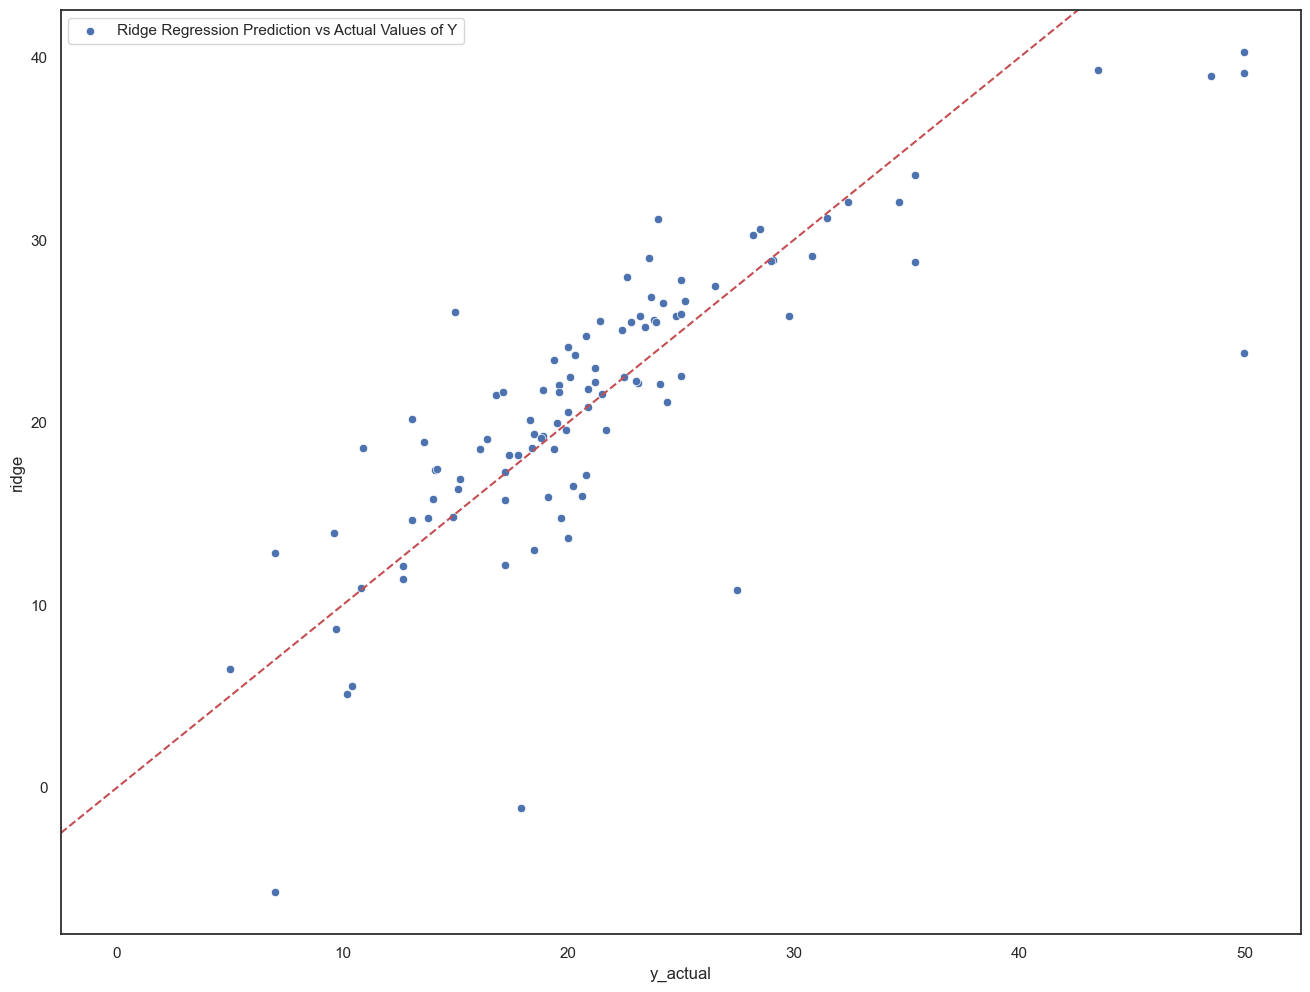

In [160]:
model_evaluation = pd.DataFrame({'lg':model_predicting,'ridge':y_pred_ridge,'y_actual':y_test})
model_evaluation
plt.figure(figsize=(16,12))
sns.scatterplot(data=model_evaluation,x='y_actual',y='ridge',label='Ridge Regression Prediction vs Actual Values of Y')
plt.axline(xy1=[0,0],slope=1,c='r', linestyle='--', label='perfect prediction')


In [164]:
model_evaluation_long = pd.melt(model_evaluation, id_vars='y_actual',value_vars=['ridge','lg'], value_name='y_predicted')
model_evaluation_long

,y_actual,variable,y_predicted
0,23.6,ridge,29.047596
1,32.4,ridge,32.120175
2,13.6,ridge,18.958636
3,22.8,ridge,25.521455
4,16.1,ridge,18.537769
...,...,...,...
199,17.9,lg,-1.220204
200,9.6,lg,13.773746
201,17.2,lg,15.901384
202,22.5,lg,22.533686


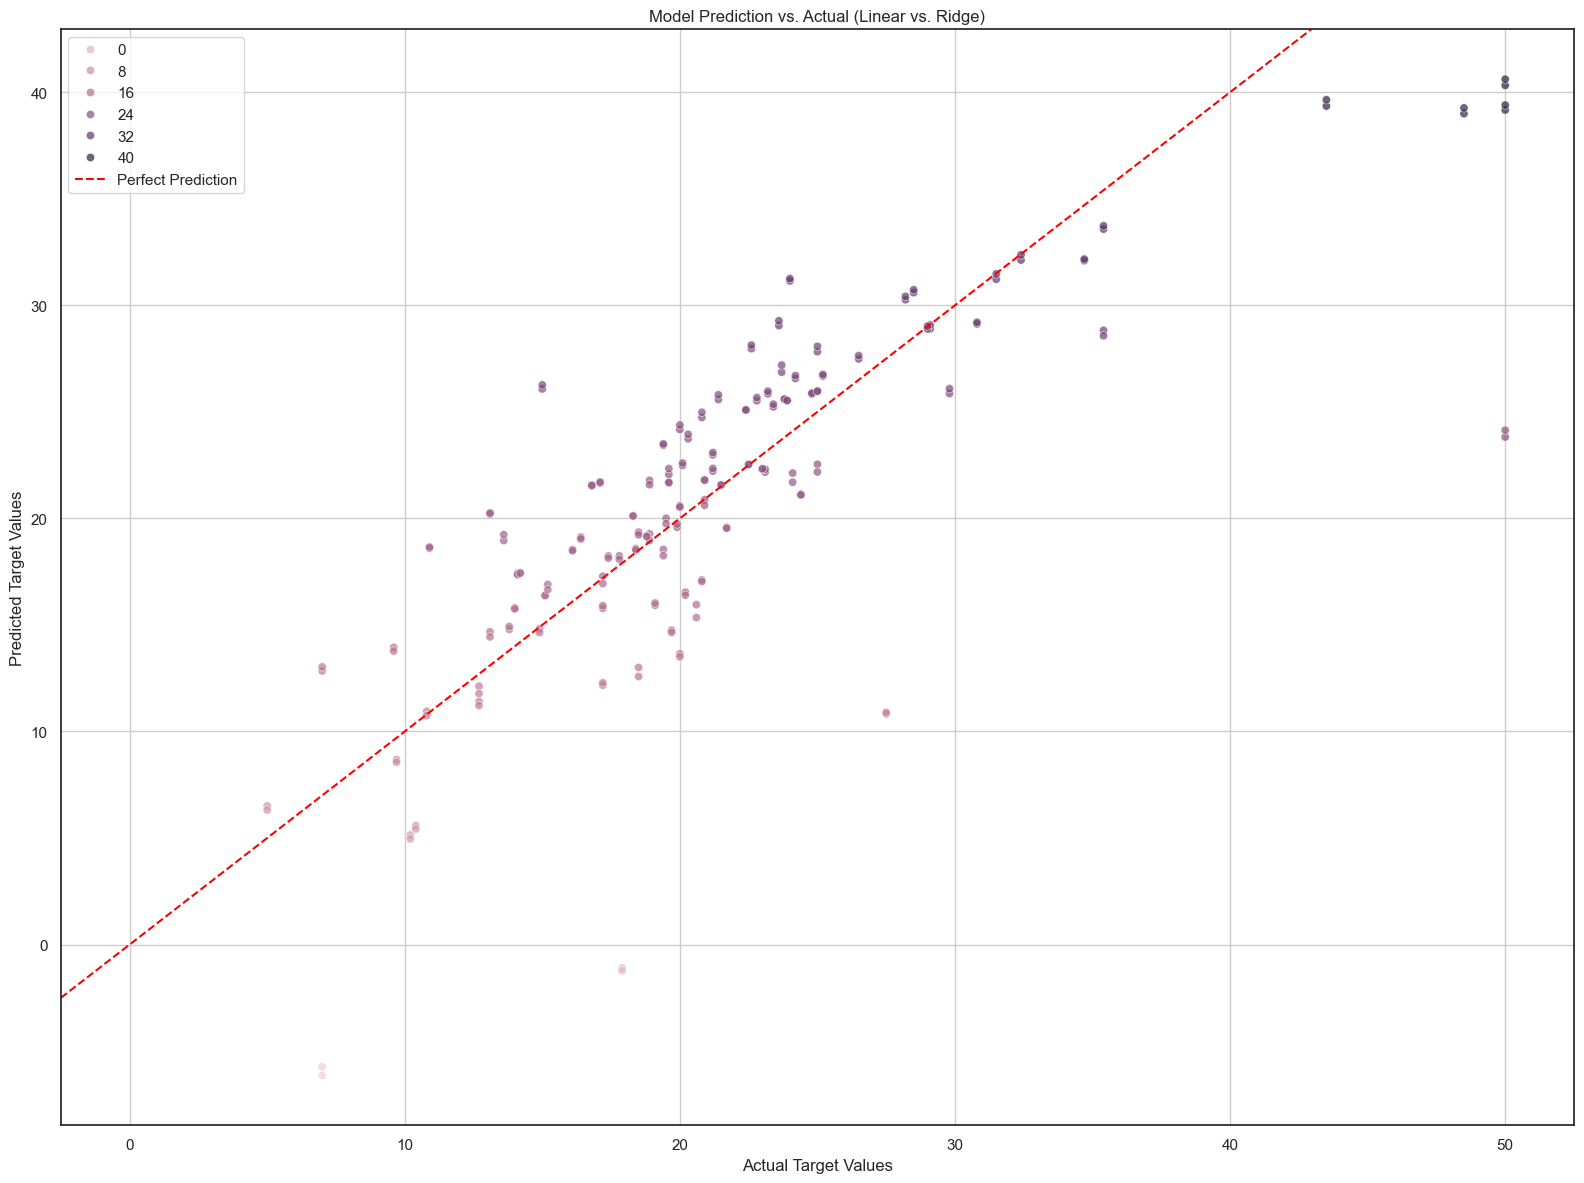

In [170]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=model_evaluation_long,x='y_actual',y='y_predicted',hue='y_predicted',alpha=.7)
plt.axline(xy1=(0, 0), slope=1, color='red', linestyle='--', label='Perfect Prediction')

# Labels and title
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Model Prediction vs. Actual (Linear vs. Ridge)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()